# 사전 설치

In [1]:
!pip install wordcloud
!pip install konlpy
!sudo apt-get update
!sudo apt-get install -y fonts-nanum fonts-noto-cjk
!fc-list | grep -i "nanum\|noto"
!sudo apt-get update
!sudo apt-get install openjdk-11-jdk -y

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 99.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 122.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [konlpy]2m2/3 [konlpy]
Get:1 http://security.ubuntu.com/ubuntu noble-security InRelease [126 kB]
Get:2 http://archive.ubuntu.com/ubuntu noble InRelease [256 kB]
Get:3 http://security.ubuntu.com/ubuntu noble-security/main amd64 Packages [1643 kB]
Get:4 http://archive.ubuntu.com/ubuntu noble-updates InRelease [126 kB]
Get:5 http://archive.ubuntu.com/ubuntu noble-backports InRelease [126 kB]
Get:6 http://archive.ubuntu.com/ubuntu noble/restricted amd64 Packages [117 kB]
Get:7 http://security.ubuntu.com/ubuntu noble-security/multiverse amd64 Packages [33.1 kB]
Get:8 http://security.ubuntu.com/ubuntu noble-security/restricted amd64 Packages [2709 kB]
Get:9 http://archive.ubuntu.com/ubuntu noble/multivers

# Source Code

In [2]:
import pandas as pd
import numpy as np

In [3]:
url = './data/'

train = pd.read_csv(url+'train.csv')

a = pd.read_csv(url+'general_dialog.csv').rename(columns={'dialogue': 'conversation'})
a['class'] = '일반 대화'
a['idx'] = range(0,len(a))
a = a[['idx','class','conversation']]

train = pd.concat([train, a], axis=0,ignore_index=True).drop(columns='idx')
train.head()

,class,conversation
0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [4]:
train.to_csv('./data/train_w_general_conv.csv')

In [5]:
train.groupby('class').count()

,conversation
class,
갈취 대화,981
기타 괴롭힘 대화,1094
일반 대화,1000
직장 내 괴롭힘 대화,979
협박 대화,896


In [6]:
extortion_data = train[train['class']=='갈취 대화']
etc_bullying_data = train[train['class']=='기타 괴롭힘 대화']
normal_convers_data = train[train['class']=='일반 대화']
work_bullying_data = train[train['class']== '직장 내 괴롭힘 대화']
threat_data = train[train['class']=='협박 대화']

extortion_data.head()

,class,conversation
3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
9,갈취 대화,자네 세금계산서 보내준 거 메일이랑 수치가 다르던데?\n그게.\n얼마나 해먹었어? ...
10,갈취 대화,네 뭐 드릴까요?\n말보르 레드 하나.\n네. 여기요!\n여기 사장은 없어?\n네 ...
13,갈취 대화,형! 형! 돈좀있어?\n저 저요.?\n여기 형말고 누가 있어? 형 얼마 있어?\n저...


In [7]:
def df2txt(data, file_name):
    with open(file_name, "w", encoding="utf-8") as f:
        for line in data["conversation"]:
            f.write(line + "\n")
    print('파일이 생성되었습니다.')

In [8]:
df2txt(extortion_data, './data/extortion_data.text')

파일이 생성되었습니다.


In [9]:
names = ['extortion_data', 'etc_bullying_data', 'normal_convers_data', 'work_bullying_data', 'threat_data']
datas = [extortion_data, etc_bullying_data, normal_convers_data, work_bullying_data, threat_data]

data_tuples = list(zip(names, datas))

for name, data in data_tuples:
    file_name = './data/wordcloud/' + name + '.txt'
    print(file_name)
    df2txt(data, file_name)


./data/wordcloud/extortion_data.txt
파일이 생성되었습니다.
./data/wordcloud/etc_bullying_data.txt
파일이 생성되었습니다.
./data/wordcloud/normal_convers_data.txt
파일이 생성되었습니다.
./data/wordcloud/work_bullying_data.txt
파일이 생성되었습니다.
./data/wordcloud/threat_data.txt
파일이 생성되었습니다.


In [12]:
from wordcloud import WordCloud

In [19]:
# -*- coding: utf-8 -*-
# 워드클라우드 기본 설치:
# pip install wordcloud matplotlib

from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pathlib import Path        

# 1️⃣ 텍스트 파일 불러오기
text_path = Path("./data/wordcloud/normal_convers_data.txt")
text = text_path.read_text(encoding="utf-8", errors="ignore")

# 2️⃣ 형태소 분석 (명사 추출)
okt = Okt()
nouns = okt.nouns(text)

# 불용어(예시): 자주 등장하지만 의미가 약한 단어들
# stopwords = {
#     "그리고", "그러면", "그러니까", "하지만", "이것", "저것", "그것",
#     "그냥", "오늘", "정말", "진짜", "조금", "아니", "그게", "하면",
#     "하여", "해서", "했던", "했다", "하는", "하여서", "하기", "하다",
#     "너무", "매우", "많이", "같은", "있는", "없는", "에서", "으로",
#     "에게", "까지", "부터", "에서", "처럼", "거나", "라도", "라도요",
# }
# 
# tokens = [t for t in tokens if t not in stopwords and len(t) >= 2]

print('완료')

완료


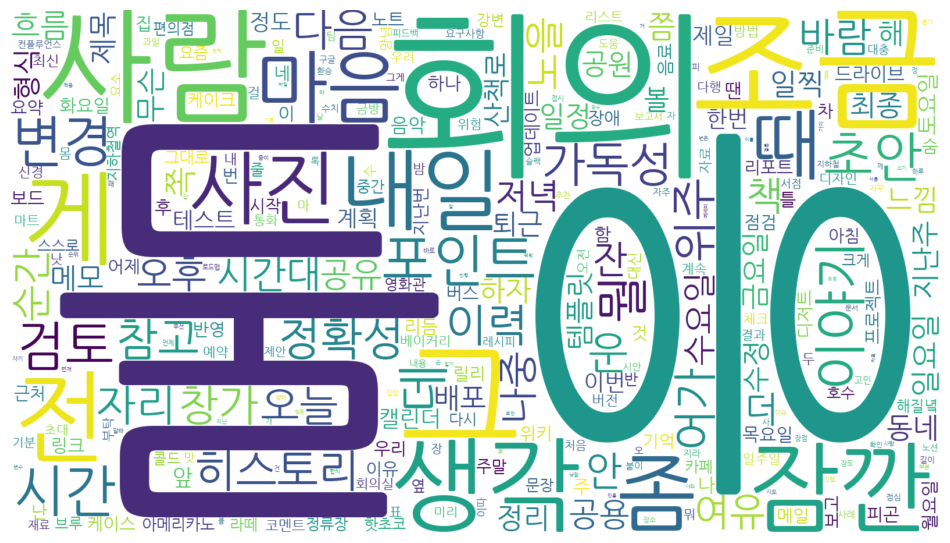

In [20]:
# 4️⃣ 빈도 계산
freqs = Counter(nouns)

# 5️⃣ 폰트 경로 (Windows 기준)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 6️⃣ 워드클라우드 생성
wc = WordCloud(
    font_path=font_path,
    width=1600,
    height=900,
    background_color="white",
    max_words=300,
    collocations=False
).generate_from_frequencies(freqs)

# 7️⃣ 시각화
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# 폰트 목록 확인

In [25]:
import pandas as pd
from pandas import DataFrame
from matplotlib import font_manager

In [26]:
flist = font_manager.findSystemFonts()
flist

['/usr/share/texmf/fonts/opentype/public/lm/lmroman8-bold.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmmono9-regular.otf',
 '/usr/share/fonts/opentype/urw-base35/NimbusMonoPS-Bold.otf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-BoldOblique.ttf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmsans8-regular.otf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/opentype/urw-base35/NimbusSansNarrow-Bold.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmroman6-regular.otf',
 '/usr/share/fonts/opentype/urw-base35/URWBookman-Light.otf',
 '/usr/share/fonts/opentype/urw-base35/C059-Italic.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmmonoslant10-regular.otf',
 '/usr/share/fonts/opentype/urw-base35/NimbusSans-Italic.otf',
 '/usr/share/fonts/opentype/urw-base35/NimbusSans-BoldItalic.otf',
 '/usr/share/fonts/opentype/urw-base35/P052-Roman.otf',
 '/usr/share/fonts/truetype/dejavu/D

# wordcloud 생성 함수

In [30]:
def text2wordcloud(data_tuples, include_tags, stopwords=None):
    base_path = "./data/wordcloud/"
    okt = Okt()
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
    for name, data in data_tuples:
        print(name)
        text = Path(base_path + name + '.txt').read_text(encoding="utf-8", errors="ignore")
        # 형태소 분석 (단어, 품사)
        pos_tags = okt.pos(text, stem=True, norm=True)
        # 원하는 품사만 추출
        words = [
            word for word, tag in pos_tags
            if tag in include_tags and len(word) > 1 and word not in stopwords
        ]
        freqs = Counter(words)
        wc = WordCloud(
            font_path=font_path,
            width=1600,
            height=900,
            background_color="white",
            max_words=300,
            collocations=False
        ).generate_from_frequencies(freqs)
        plt.figure(figsize=(12, 8))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.show()

extortion_data


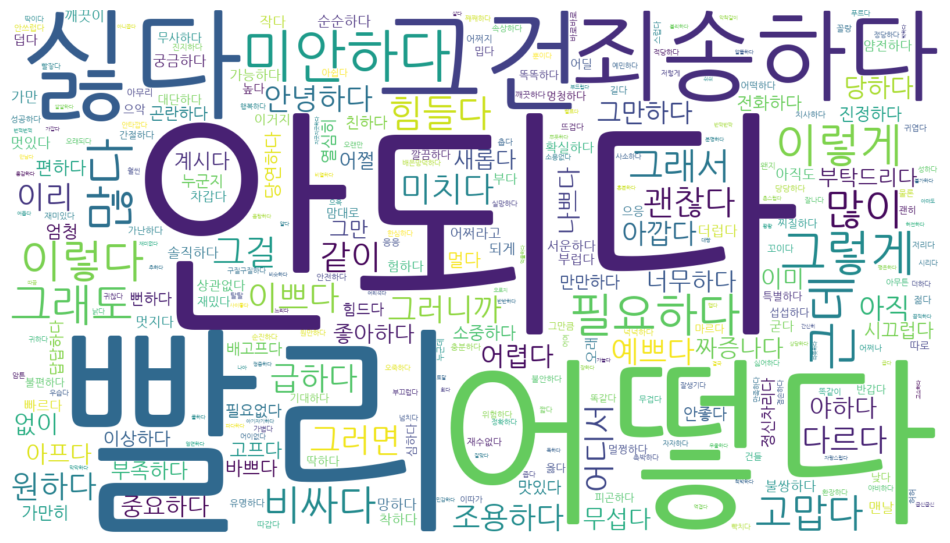

etc_bullying_data


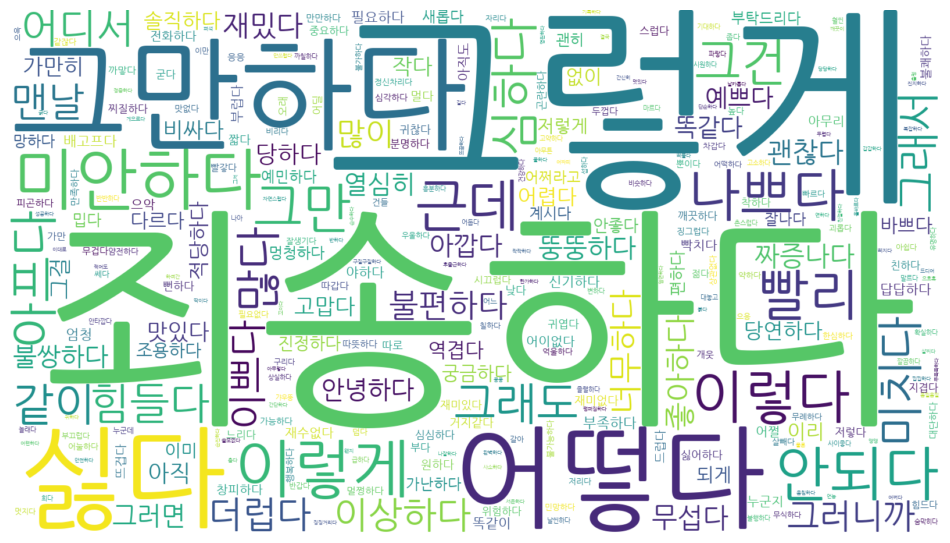

normal_convers_data


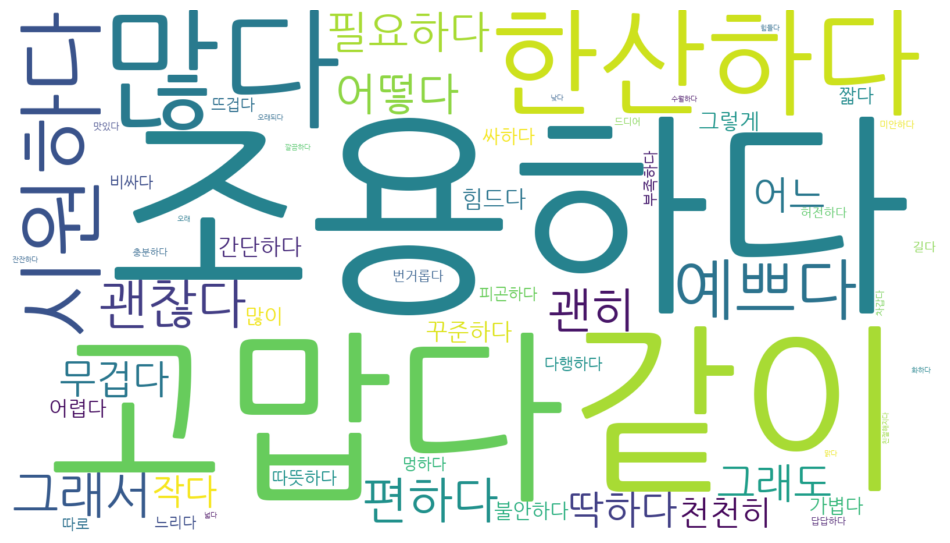

work_bullying_data


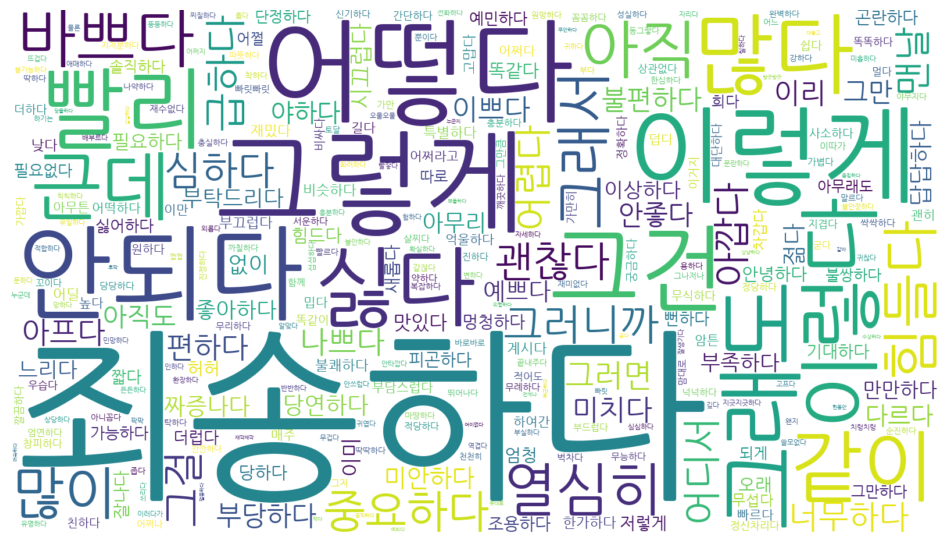

threat_data


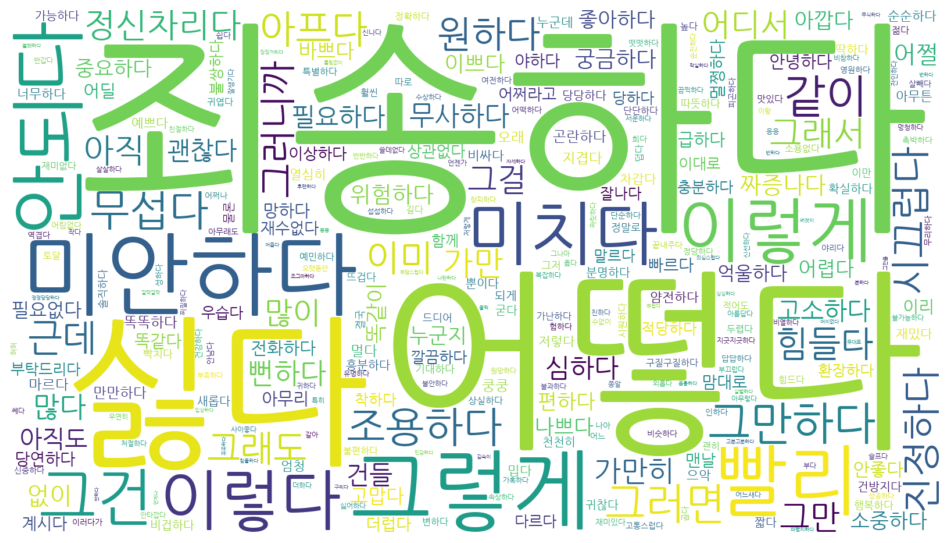

In [34]:
include_tags = {"Adjective", "Adverb"}
stopwords = {
    "하다", "되다", "이다", "있다", "같다", "그렇다",
    "되다", "하다", "되다", "하다", "정말", "진짜", "너무",
    "이것", "저것", "그것", "우리", "그리고", "에서", "으로",
    "없다", "좋다", "아니다"
}

text2wordcloud(data_tuples, include_tags, stopwords)